<a href="https://colab.research.google.com/github/EvgeniiSopov/plotlyRendering/blob/master/okaivd_21_11_2020_my.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# импорт пакетов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# plotly
# pip install plotly / conda install plotly

import plotly.graph_objects as go

%matplotlib inline 

import plotly.io as pio
#pio.renderers.default='notebook'

# Датасет Ирисы Фишера

Ирисы Фишера — это набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном.Этот набор данных стал уже классическим, и часто используется в литературе для иллюстрации работы различных статистических алгоритмов.

Ирисы Фишера состоят из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). 

Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

* Длина наружной доли околоцветника (англ. sepal length);
* Ширина наружной доли околоцветника (англ. sepal width);
* Длина внутренней доли околоцветника (англ. petal length);
* Ширина внутренней доли околоцветника (англ. petal width).


На основании этого набора данных требуется построить правило классификации, определяющее вид растения по данным измерений. Это задача многоклассовой классификации, так как имеется три класса — три вида ириса.

Один из классов (Iris setosa) линейно-разделим от двух остальных.

<img src="https://robinchao.github.io/assets/iris-dataset.jpg" />

<img src="https://ranalytics.github.io/data-mining/figures/iris.PNG" />

http://archive.ics.uci.edu/ml/datasets/Iris 

http://archive.ics.uci.edu/ml/machine-learning-databases/iris/ 

In [3]:
data_raw = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
data_raw.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
attributes=names[0:4]
data_raw.columns=names
data_raw.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data_raw = sns.load_dataset('iris')
data_raw.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
names = ['sepal_length', 	'sepal_width', 	'petal_length', 	'petal_width', 	'species']
attributes = ['sepal_length', 	'sepal_width', 	'petal_length', 	'petal_width']

# EDA, Exploratory Data Analysis

In [8]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data_raw.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
data_raw['species'].describe()

count            150
unique             3
top       versicolor
freq              50
Name: species, dtype: object

In [11]:
data_raw['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

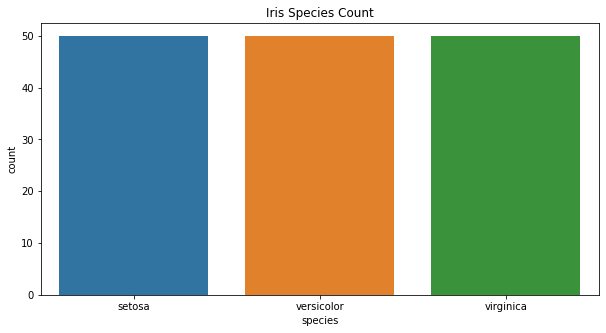

In [12]:
ax = plt.subplots(1,1,figsize=(10,5))
sns.countplot(data=data_raw, x='species')
plt.title("Iris Species Count")
plt.show()

Распределения данных по какждому из атрибутов

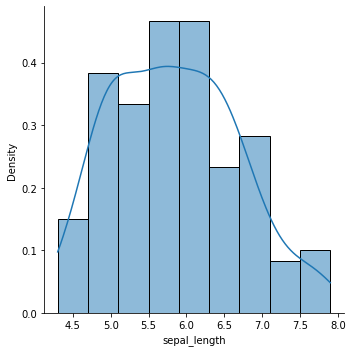

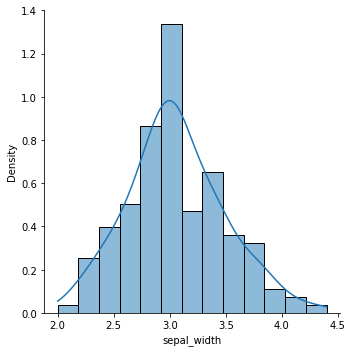

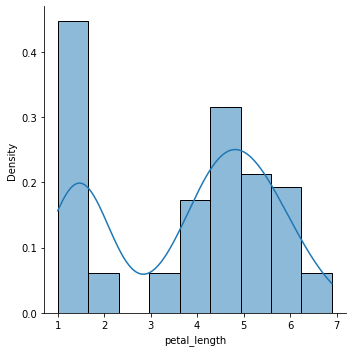

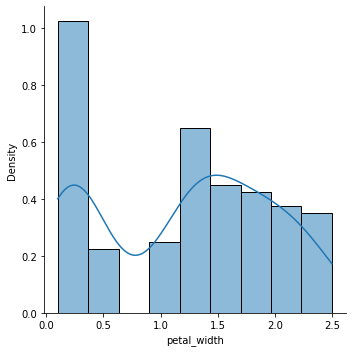

In [15]:
for attr_name in attributes:
  sns.displot(data=data_raw, x=attr_name, stat="density", kde=True)

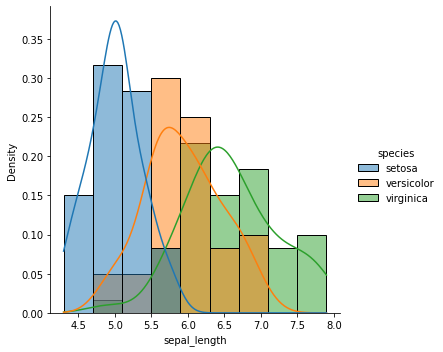

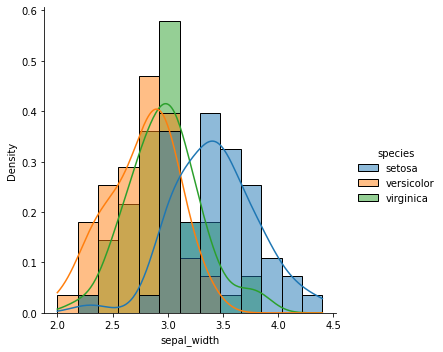

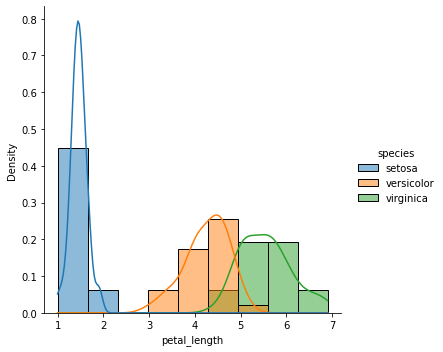

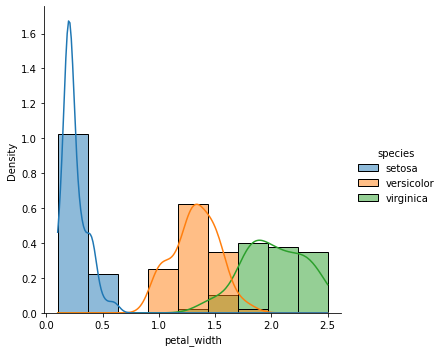

In [17]:
for attr_name in attributes:
  sns.displot(data=data_raw, x=attr_name, stat="density", kde=True, hue='species')

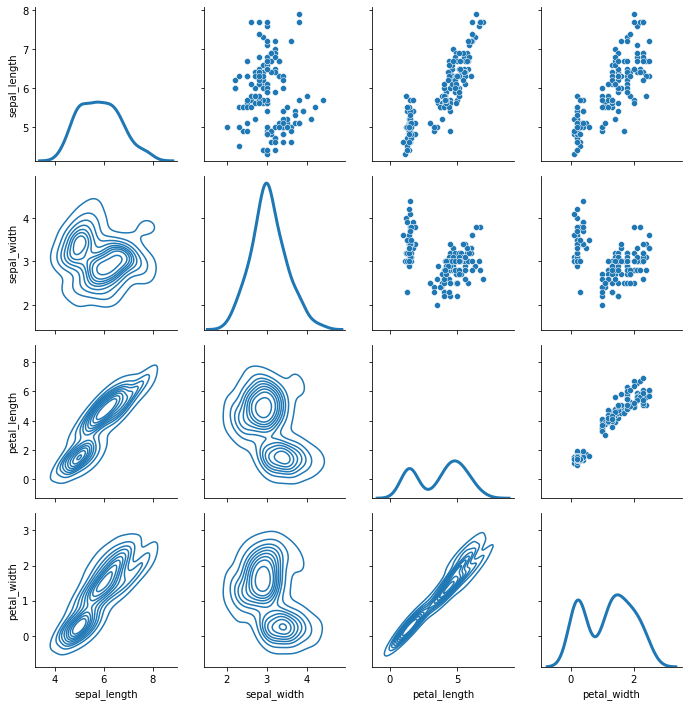

In [18]:
g = sns.PairGrid(data_raw)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

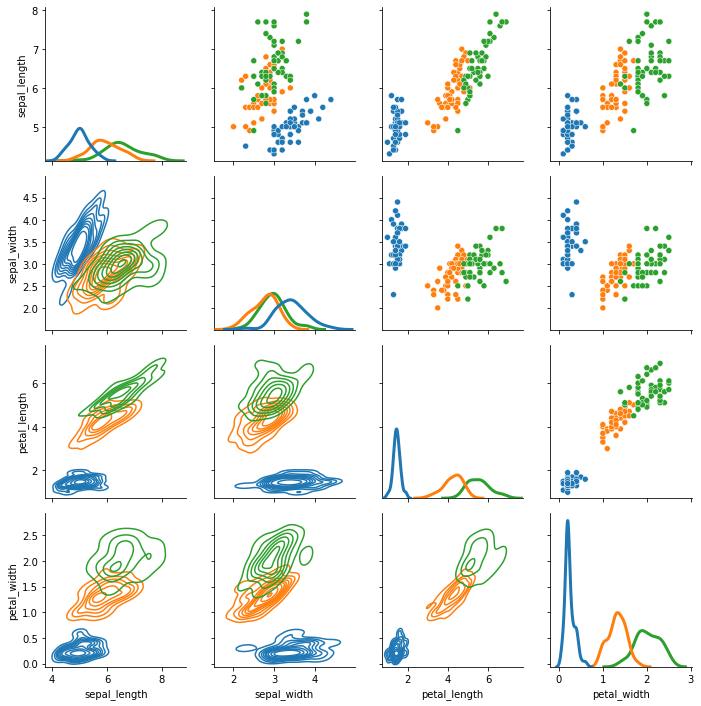

In [19]:
g = sns.PairGrid(data_raw, hue='species')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

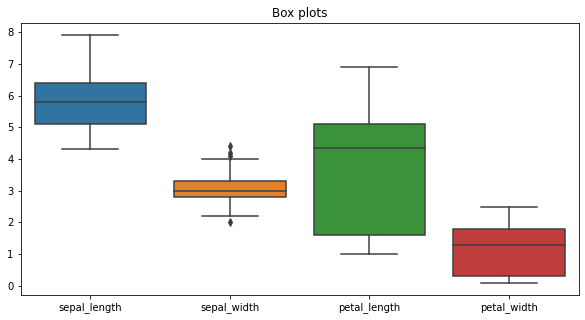

In [20]:
ax = plt.subplots(1,1,figsize=(10,5))
sns.boxplot(data=data_raw)
plt.title("Box plots")
plt.show()

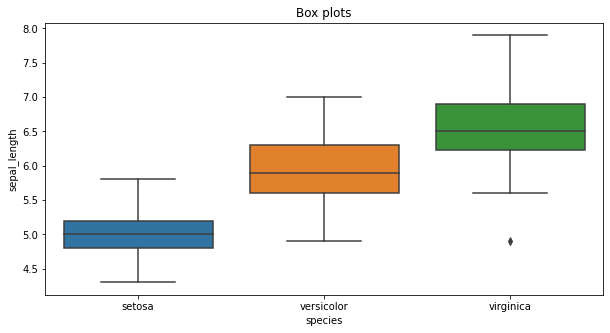

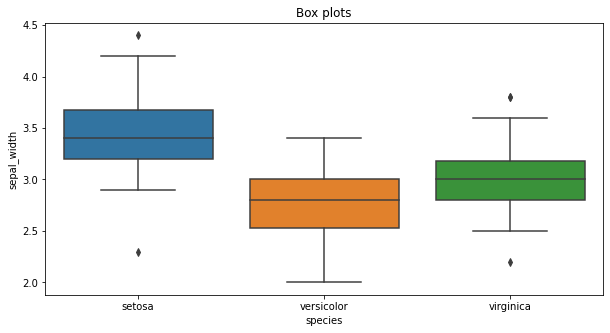

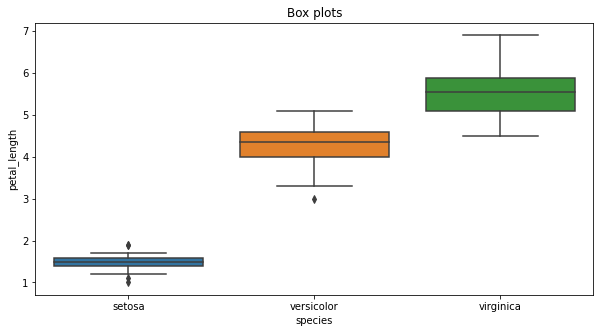

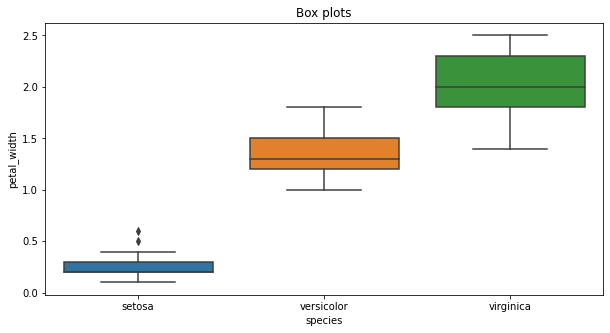

In [21]:
for attr_name in attributes:
  ax = plt.subplots(1,1,figsize=(10,5))
  sns.boxplot(data=data_raw, x='species', y=attr_name)
  plt.title("Box plots")
  plt.show()

Корреляции

In [24]:
data_raw.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


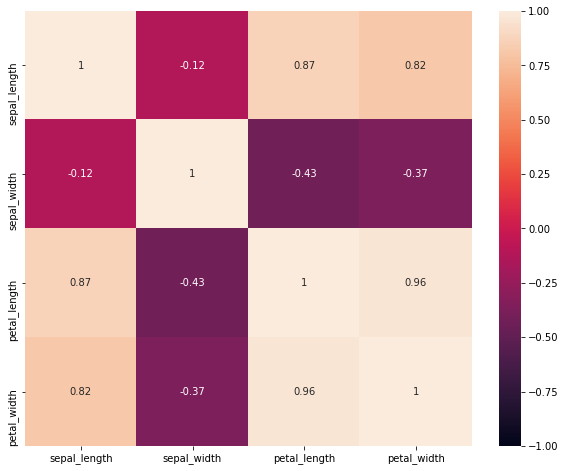

In [23]:
ax = plt.subplots(1,1,figsize=(10,8))
sns.heatmap(data=data_raw.corr(), annot=True, vmin=-1, vmax=1, cmap='rocket')
plt.show()

In [27]:
# классы как числа для раскраски
colors_via_class=np.zeros(len(data_raw['species']))
colors_via_class=np.where(data_raw['species']=='setosa', 0, colors_via_class)
colors_via_class=np.where(data_raw['species']=='versicolor', 1, colors_via_class)
colors_via_class=np.where(data_raw['species']=='virginica', 2, colors_via_class)
colors_via_class

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [28]:
var1=data_raw[attributes[0]]
var2=data_raw[attributes[1]]
var3=data_raw[attributes[2]]

fig = go.Figure()
fig.add_traces(
    go.Scatter3d(
        x=var1, y=var2, z=var3,
        mode='markers', 
        marker=dict(size=3, color=colors_via_class, line=dict(color='black',width=1),
        colorscale='Jet')        
    )
)
fig.update_layout(
    width=600, 
    height=600,
    xaxis=dict(range=[var1.min(),var1.max()]),
    yaxis=dict(range=[var2.min(),var2.max()]),
    scene=dict(
            xaxis=dict(title=attributes[0], range=[var1.min(),var1.max()]),
            yaxis=dict(title=attributes[1], range=[var2.min(),var2.max()]),
            zaxis=dict(title=attributes[2], range=[var3.min(),var3.max()])
    ),
    title=dict(
        text='3D scatter plot (3 attributes)',
        font=dict(size=18),
    ),
    title_x=0.5
)
fig.show()

# PCA, метод главных компонент

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA()
inputData = data_raw.drop(columns=['species']).copy()
pca.fit(inputData)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [31]:
print(pca.explained_variance_ratio_*100)

[92.46187232  5.30664831  1.71026098  0.52121839]


In [32]:
pcaData=pd.DataFrame(pca.transform(inputData))
pcaNames=[]
for i in range(4):
  pcaNames.append('pc'+str(i+1))
pcaData.columns=pcaNames
pcaData['species']=data_raw['species'].copy()
pcaData['colors']=colors_via_class
pcaData.head()

,pc1,pc2,pc3,pc4,species,colors
0,-2.684126,0.319397,-0.027915,-0.002262,setosa,0.0
1,-2.714142,-0.177001,-0.210464,-0.099027,setosa,0.0
2,-2.888991,-0.144949,0.017900,-0.019968,setosa,0.0
3,-2.745343,-0.318299,0.031559,0.075576,setosa,0.0
4,-2.728717,0.326755,0.090079,0.061259,setosa,0.0


1D

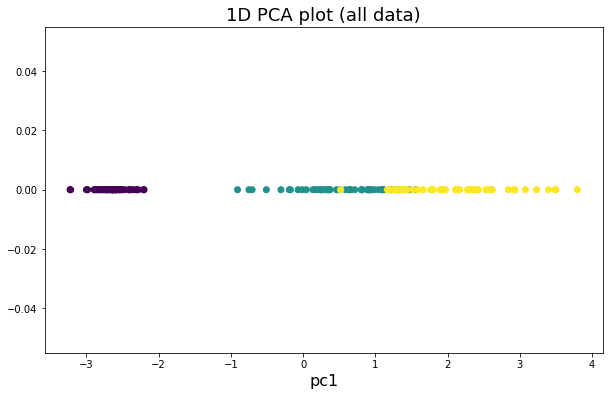

In [34]:

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter( pcaData['pc1'], np.zeros(len(pcaData['pc1'])), c=pcaData['colors'] )
ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel("", fontsize=16)
ax.set_title('1D PCA plot (all data)', fontsize=18)
plt.show()

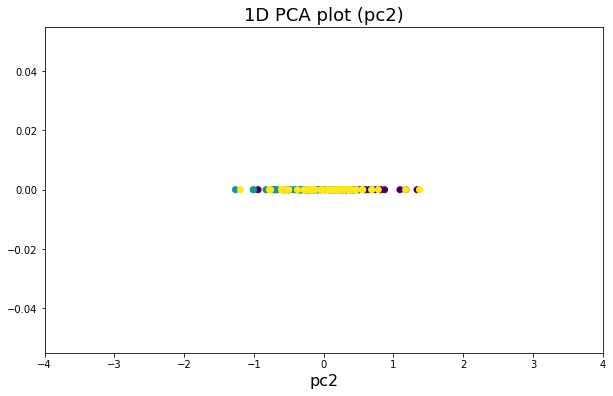

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter (pcaData['pc2'], np.zeros(len(pcaData['pc2'])), c=pcaData['colors'])
ax.set_xlabel('pc2', fontsize=16)
ax.set_ylabel('', fontsize=16)
ax.set_title('1D PCA plot (pc2)', fontsize=18)
ax.set_xlim(-4,4)
plt.show()

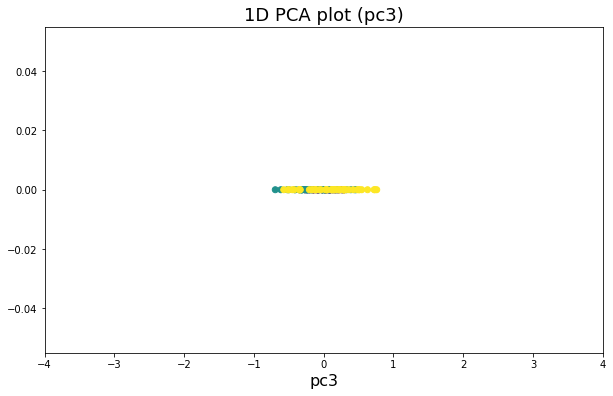

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter (pcaData['pc3'], np.zeros(len(pcaData['pc3'])), c=pcaData['colors'])
ax.set_xlabel('pc3', fontsize=16)
ax.set_ylabel('', fontsize=16)
ax.set_title('1D PCA plot (pc3)', fontsize=18)
ax.set_xlim(-4,4)
plt.show()

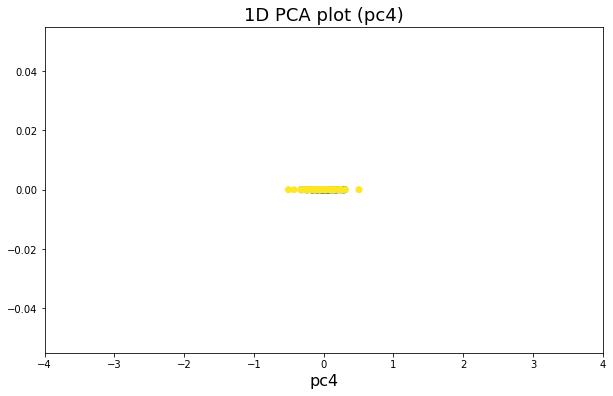

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter (pcaData['pc4'], np.zeros(len(pcaData['pc4'])), c=pcaData['colors'])
ax.set_xlabel('pc4', fontsize=16)
ax.set_ylabel('', fontsize=16)
ax.set_title('1D PCA plot (pc4)', fontsize=18)
ax.set_xlim(-4,4)
plt.show()

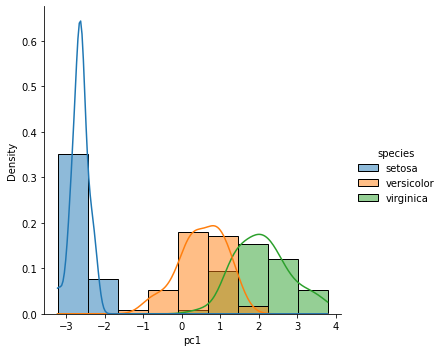

In [39]:
sns.displot(data=pcaData, x='pc1', stat="density", kde=True, hue='species')

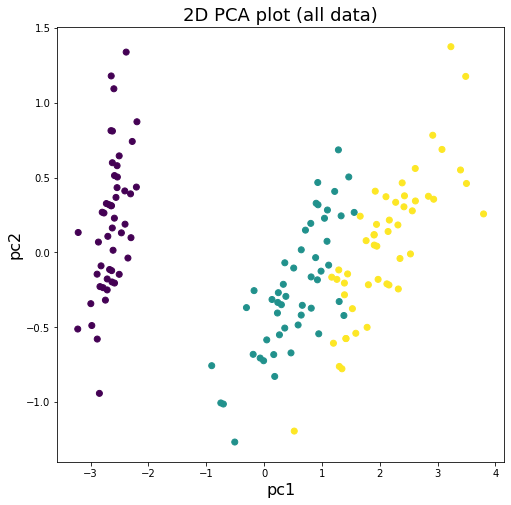

In [40]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter( pcaData['pc1'], pcaData['pc2'], c=pcaData['colors'] )
ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('pc2', fontsize=16)
ax.set_title('2D PCA plot (all data)', fontsize=18)
plt.show()

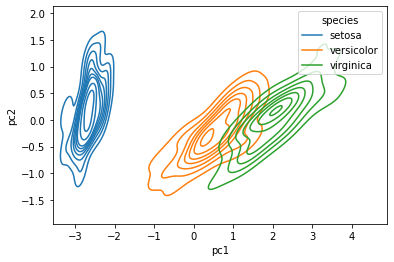

In [41]:
sns.kdeplot(data=pcaData, x='pc1', y='pc2', hue='species')

In [42]:
var1=pcaData['pc1']
var2=pcaData['pc2']
var3=pcaData['pc3']

fig = go.Figure()
fig.add_traces(
    go.Scatter3d(
        x=var1, y=var2, z=var3,
        mode='markers', 
        marker=dict(size=3, color=colors_via_class, line=dict(color='black',width=1),
        colorscale='Jet')        
    )
)
fig.update_layout(
    width=600, 
    height=600,
    xaxis=dict(range=[var1.min(),var1.max()]),
    yaxis=dict(range=[var2.min(),var2.max()]),
    scene=dict(
            xaxis=dict(title='pc1', range=[var1.min(),var1.max()]),
            yaxis=dict(title='pc2', range=[var2.min(),var2.max()]),
            zaxis=dict(title='pc3', range=[var3.min(),var3.max()])
    ),
    title=dict(
        text='3D scatter plot (3 attributes)',
        font=dict(size=18),
    ),
    title_x=0.5
)
fig.show()

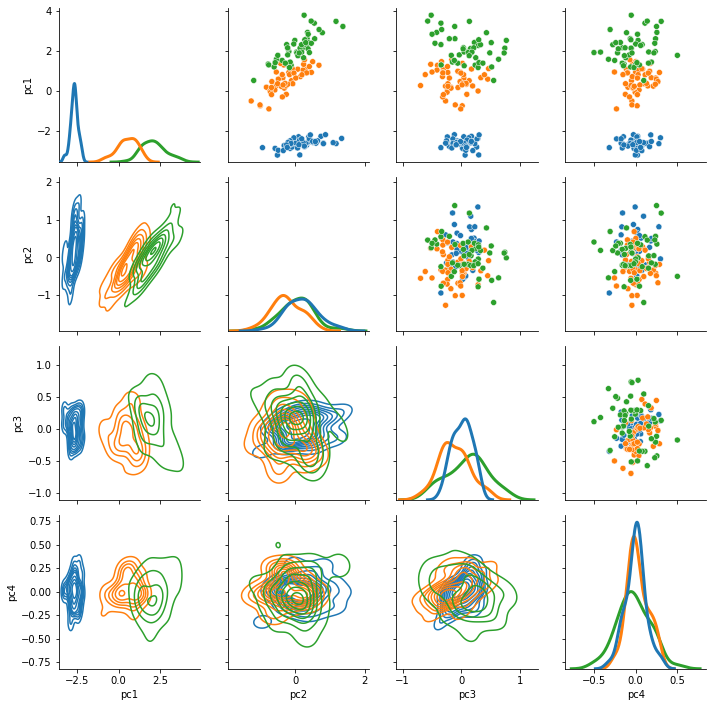

In [43]:
g = sns.PairGrid(pcaData.drop(columns=['colors']), hue='species')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)